In [1]:
import numpy as np
import scipy as scipy

import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import CubicSpline

from python_profile_code.ode_theta import ODE_theta

from python_profile_code.react import react_prime

from python_profile_code.parameters import alpha, vstar, l

from python_profile_code.find_roots import find_roots

import os

from python_profile_code.get_delta_theta import get_delta_theta

from python_profile_code.get_solutions import get_solutions

In [51]:
#this is a notebook that finds eigenvalues (omegas) based on profiles and wave speeds c(alpha)

#using blake's matlab profiles and wave speeds


In [55]:
alpha,vstar, l

(0.05, 0.1, 0.027)

In [57]:
dir=os.getcwd()

In [59]:
dir

'/Users/ochandrasekhar/Desktop/python_code'

In [61]:
#specify directory with info data
directory_info=dir+"/data/data_info"


#specify directory with profile data

directory_profiles=dir+"/data/data_profile"

In [63]:
str(directory_info)+"/name"

'/Users/ochandrasekhar/Desktop/python_code/data/data_info/name'

In [65]:
info_files=[]
sorted_info_files = sorted([name for name in os.listdir(directory_info)])

for name in sorted_info_files:
    #print(name)
    
    #print(str(directory_info)+f"/{name}")
    #path=str(directory_info)+'/'name  #DON't USE THIS LINE
    path=str(directory_info)+f"/{name}" #USE THIS LINE
    info_csv=np.genfromtxt(path, delimiter=",")
    
    info_files.append(info_csv)
#len(info_files)
    

In [67]:
profile_files=[]
sorted_profile_files = sorted([name for name in os.listdir(directory_profiles)])

for name in sorted_profile_files:
   #  print(name)

    
    path=str(directory_profiles)+f"/{name}"
    profiles_csv=np.genfromtxt(path,delimiter=",")
    
    profile_files.append(profiles_csv)
#len(profile_files)

4000


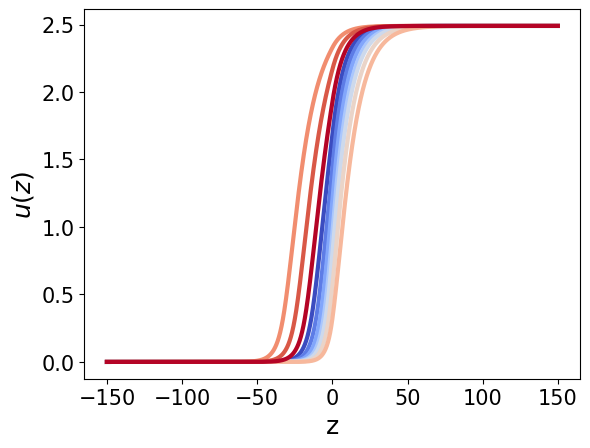

In [69]:
#have to use a cubic spline interpolant for each
I=150
steps=len(profile_files[0][0])
print(steps)
x_vals=np.linspace(-I,I, steps)

profile_polynomials_for_plots=[]

num_vals=len(profile_files[::3])

colors=plt.cm.coolwarm(np.linspace(0.0,1,num_vals)) 

fig, ax = plt.subplots()#figsize=(6,5))
ax.set_xlabel(r"$z$", fontsize=18)
ax.set_ylabel(r"$u(z)$",fontsize=18)
ax.tick_params(axis="both", which="major", labelsize=15)


for index,item in enumerate(profile_files[::3]):
    
    profile=item[0]

    profile_poly_for_plots=scipy.interpolate.CubicSpline(x_vals, profile)
    profile_polynomials_for_plots.append(profile_poly_for_plots)
    
    plt.plot(x_vals, profile_poly_for_plots(x_vals), color=colors[index], linewidth=3)
plt.xlabel("z")
plt.ylabel(r"$u(z)$")
#plt.savefig("profile_solutions.eps", format="eps",bbox_inches='tight')
#plt.title("temperature profile")
plt.show()

In [11]:
umin, umax=find_roots(vstar,l)

In [12]:
#define eigenvalue parameter values to loop through
num_omega_vals=100
lower_bound=-.01
upper_bound=0
omega_vals=np.linspace(lower_bound,upper_bound,num_omega_vals)

spacing=(upper_bound-lower_bound)/num_omega_vals

#omega lower limit determined by need for discriminant of square root to be positive
#[0,1,2]

In [13]:
def find_zero(a,b,fun):

    fa = fun(a)
    fb = fun(b)

    while abs(b-a) > 1e-12:
        c = (a+b)/2
        fc = fun(c)
        if fa*fc > 0:
            a = c
        else:
            b = c
            
    return c

In [14]:
x_steps=len(profile)
x_dom=np.linspace(-I,I, x_steps)

all_delta_theta_lists=[]

zero_list=[]

c_vals=[]

phase_vals=[]
profile_polynomials=[]

for index,item in enumerate(profile_files):
    profile=item[0]

    profile_poly=scipy.interpolate.CubicSpline(x_vals, profile)
    profile_polynomials.append(profile_poly)

for index,item in enumerate(info_files):

    c=item[-1]
    phase=item[-3]
    c_vals.append(c)
    phase_vals.append(phase)
    profile_poly=profile_polynomials[index]
    #print("wave speed is c= ", c)
    
    delta_theta_list=[]
    gdt=lambda omega: get_delta_theta(omega,c,x_dom,profile_poly)
        
    for omega in omega_vals:
        delta_theta=gdt(omega)
        delta_theta_list.append(delta_theta)
        
    zero=find_zero(lower_bound, upper_bound, gdt)
    
    zero_list.append(zero)
    
#print(zero_list)


    all_delta_theta_lists.append(delta_theta_list)
    #print(len(delta_theta_list))
   # plt.scatter(omega_vals,delta_theta_list)
  

       
  
    

In [15]:
new_delta_theta_lists=[]
for list in all_delta_theta_lists:
    new_list=[item+np.pi for item in list]
    new_delta_theta_lists.append(new_list)
       

In [16]:
#for index,item in enumerate(all_delta_theta_lists[::3]):
   # print(item)

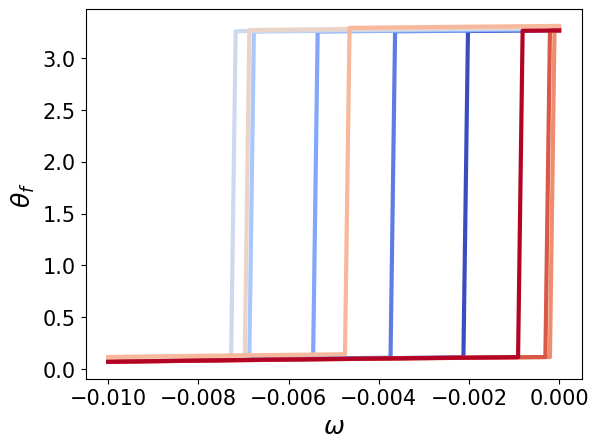

In [17]:
num_vals=len(all_delta_theta_lists[::3])

#colors=plt.cm.RdBu(np.linspace(0.15,0.85,num_vals)) 
colors=plt.cm.coolwarm(np.linspace(0.0,1,num_vals)) 
fig, ax = plt.subplots()#figsize=(6,5))
ax.set_xlabel(r"$\omega$", fontsize=18)
ax.set_ylabel(r"$\theta_f$",fontsize=18)
ax.tick_params(axis="both", which="major", labelsize=15)

#new_delta_theta_list=[x[0]+2*np.pi for x[0] in all_delta_theta_lists ]

for index,item in enumerate(new_delta_theta_lists[::3]):
    plt.plot(omega_vals,item, linewidth=3,color=colors[index])

   
    #plt.title("The accumulated angle")
   
    #plt.savefig("acc_angle.eps", format="eps",bbox_inches='tight')
    
    #plt.plot(c_vals,zero_list)
    #plt.show()
 #   plt.legend()
  #  plt.ylim(-.5,.2)
  #  plt.show()

In [18]:
#num_vals=len(solution_list[::5])

#colors = plt.cm.viridis(np.linspace(0,1,num_vals))

for index,item in enumerate(info_files):
    solution_list=[]
    st=lambda omega: get_solutions(omega,c,x_dom,profile_poly)
        
    for omega in omega_vals:
        solution=st(omega)
        solution_list.append(solution)
       # plt.plot(solution)
        #plt.plot(solution,color=colors[index])
#plt.xlabel("z")
#plt.savefig("angular_solutions.eps", format="eps")

In [19]:
new_solution_list=[]
for list in solution_list:
    new_list=[item+np.pi for item in list]
    new_solution_list.append(new_list)
       

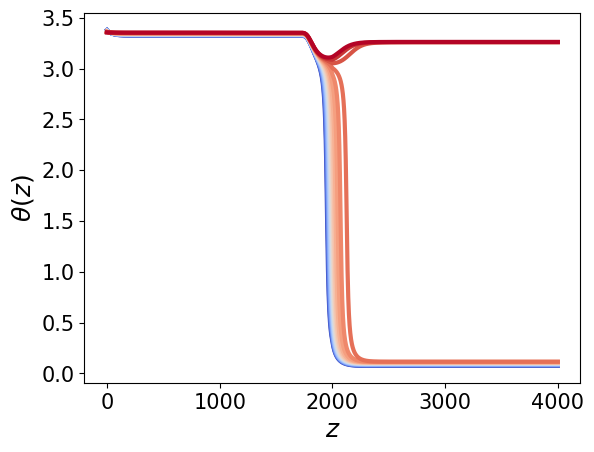

In [20]:
num_vals=len(new_solution_list[::5])

fig, ax = plt.subplots()#figsize=(6,5))
ax.set_xlabel(r"$z$", fontsize=18)
ax.set_ylabel(r"$\theta(z)$",fontsize=18)
ax.tick_params(axis="both", which="major", labelsize=15)

colors=plt.cm.coolwarm(np.linspace(0.0,1,num_vals)) 
#colors=plt.cm.RdBu(np.linspace(0.15,0.85,num_vals)) 
for index,solution in enumerate(new_solution_list[::5]):
    plt.plot(solution,color=colors[index], linewidth=3)
#plt.savefig("angular_solutions.eps", format="eps",bbox_inches='tight')
plt.show()

In [21]:
print(zero_list)

[-0.002056934944703244, -0.0025537666137097396, -0.0030916667630663144, -0.003659259046544321, -0.00424296424665954, -0.0048270696407416835, -0.005393857053131796, -0.005923990083974786, -0.006397073362604713, -0.006792368968599477, -0.00012289202830288558, -0.007089496704866179, -0.0072688579437090095, -0.007311292486847377, -0.007197124343947507, -0.006904697222053073, -0.006409161687479355, -0.00568359205906745, -0.004706608097185381, -0.003486652762512675, -0.00211699873150792, -0.00014195485447999096, -0.0008438744762679563, -0.00019124133803416038, -0.00028277802106458695, -0.0004261629079701379, -0.0006282226467737927, -0.0008927777380449696, -0.001220783336902969, -0.001610319613828324]


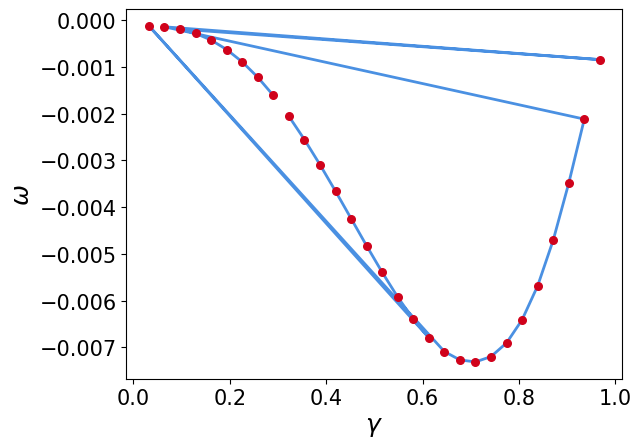

In [22]:
fig, ax = plt.subplots()#figsize=(6,5))
ax.set_xlabel(r"$\gamma$", fontsize=18)
ax.set_ylabel(r"$\omega$",fontsize=18)
ax.tick_params(axis="both", which="major", labelsize=15)

#'#D0021B','#4A90E2' ] 
plt.scatter(phase_vals,zero_list, color="#D0021B", s=30,zorder=2)
plt.plot(phase_vals,zero_list,linewidth=2, color="#4A90E2",zorder=1)
#plt.scatter(phase_vals, c_vals)

#plt.title("The largest eigenvalue for each solution")
#plt.savefig("mincurve_1.eps", format="eps",bbox_inches='tight')
plt.show()

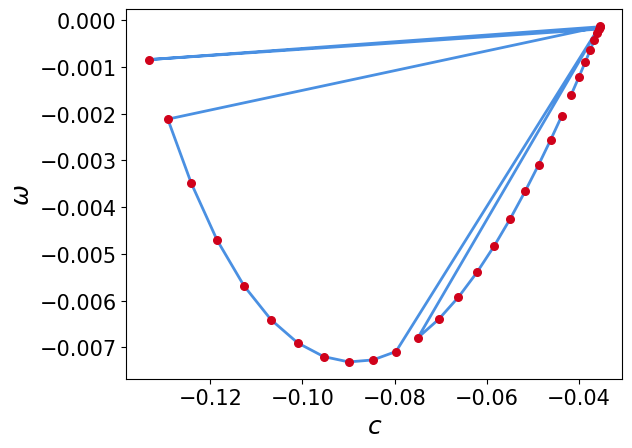

In [23]:
fig, ax = plt.subplots()#figsize=(6,5))
ax.set_xlabel(r"$c$", fontsize=18)
ax.set_ylabel(r"$\omega$",fontsize=18)
ax.tick_params(axis="both", which="major", labelsize=15)

plt.plot(c_vals,zero_list,linewidth=2,zorder=1, color="#4A90E2")
plt.scatter(c_vals,zero_list, color="#D0021B", s=30, zorder=2)

#plt.title("The largest eigenvalue for each solution")
#plt.savefig("mincurve_2.eps", format="eps",bbox_inches='tight')
#plt.savefig("mincurve_2.png", format="png",bbox_inches='tight')
plt.show()